<a href="https://colab.research.google.com/github/Sahilkasar/Predictive-Analytics-Project---Walmart-Sales-Forecasting/blob/main/Walmart_logistic_reg_and_Random_forest_classification_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv(r"C:\Users\Sahil\Documents\Python\Walmart Sales data set\features.csv")

In [ ]:
df = df1.copy()

In [ ]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12-02-2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19-02-2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26-02-2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05-03-2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
# Checking for the null values , since there are no null values ,we can move ahead with the analysis

df.isnull()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [ ]:
df['MarkDown1'].nunique()

4023

In [ ]:
# Since the date time column is in object form , converting it into the date time format
df['Date'] = pd.to_datetime(df['Date'] , dayfirst= True)
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  week          8190 non-null   UInt32        
 13  month         8190 non-null   int32         
 14  year          8190 non-null   int32         
dtypes: UInt32(1), bool(1), datetime64[ns](

#### Let's start the EDA

Sales Prediction:

If your dataset is related to retail or stores, you might want to predict sales. You could explore the relationship between sales and various factors such as temperature, fuel prices, CPI, and markdowns.
Understanding Seasonal Trends:

Analyze the data to identify seasonal trends, especially around holidays. This could help in planning inventory, marketing strategies, and staffing.
Impact of Markdowns on Sales:

Investigate the impact of markdowns on sales. Analyze whether markdowns lead to increased sales and if there's a correlation between the timing of markdowns and changes in sales.
Store Performance Analysis:

Assess the performance of different stores. Identify factors that contribute to higher or lower sales, and understand the variation in key metrics across stores.
Effect of Economic Indicators:

Explore how economic indicators such as CPI and unemployment rate relate to sales. This can help in understanding the sensitivity of sales to economic conditions.
Optimizing Pricing Strategies:

If your dataset includes pricing information, you could explore optimal pricing strategies. Analyze the relationship between prices, sales, and other factors.
Employee Staffing Optimization:

Understand if there's a correlation between unemployment rates and store performance. This information can be used to optimize employee staffing levels.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  week          8190 non-null   UInt32        
 13  month         8190 non-null   int32         
 14  year          8190 non-null   int32         
dtypes: UInt32(1), bool(1), datetime64[ns](

In [ ]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [ ]:
df['Date'].unique()

<DatetimeArray>
['2010-02-05 00:00:00', '2010-02-12 00:00:00', '2010-02-19 00:00:00',
 '2010-02-26 00:00:00', '2010-03-05 00:00:00', '2010-03-12 00:00:00',
 '2010-03-19 00:00:00', '2010-03-26 00:00:00', '2010-04-02 00:00:00',
 '2010-04-09 00:00:00',
 ...
 '2013-05-24 00:00:00', '2013-05-31 00:00:00', '2013-06-07 00:00:00',
 '2013-06-14 00:00:00', '2013-06-21 00:00:00', '2013-06-28 00:00:00',
 '2013-07-05 00:00:00', '2013-07-12 00:00:00', '2013-07-19 00:00:00',
 '2013-07-26 00:00:00']
Length: 182, dtype: datetime64[ns]

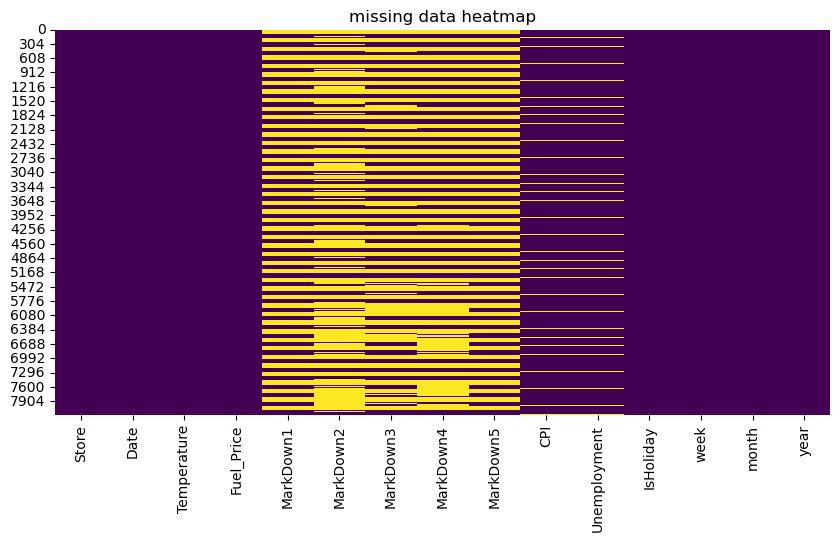

In [ ]:
# Missing data heat map
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull() , cmap = 'viridis',cbar =False)
plt.title('missing data heatmap')
plt.show()

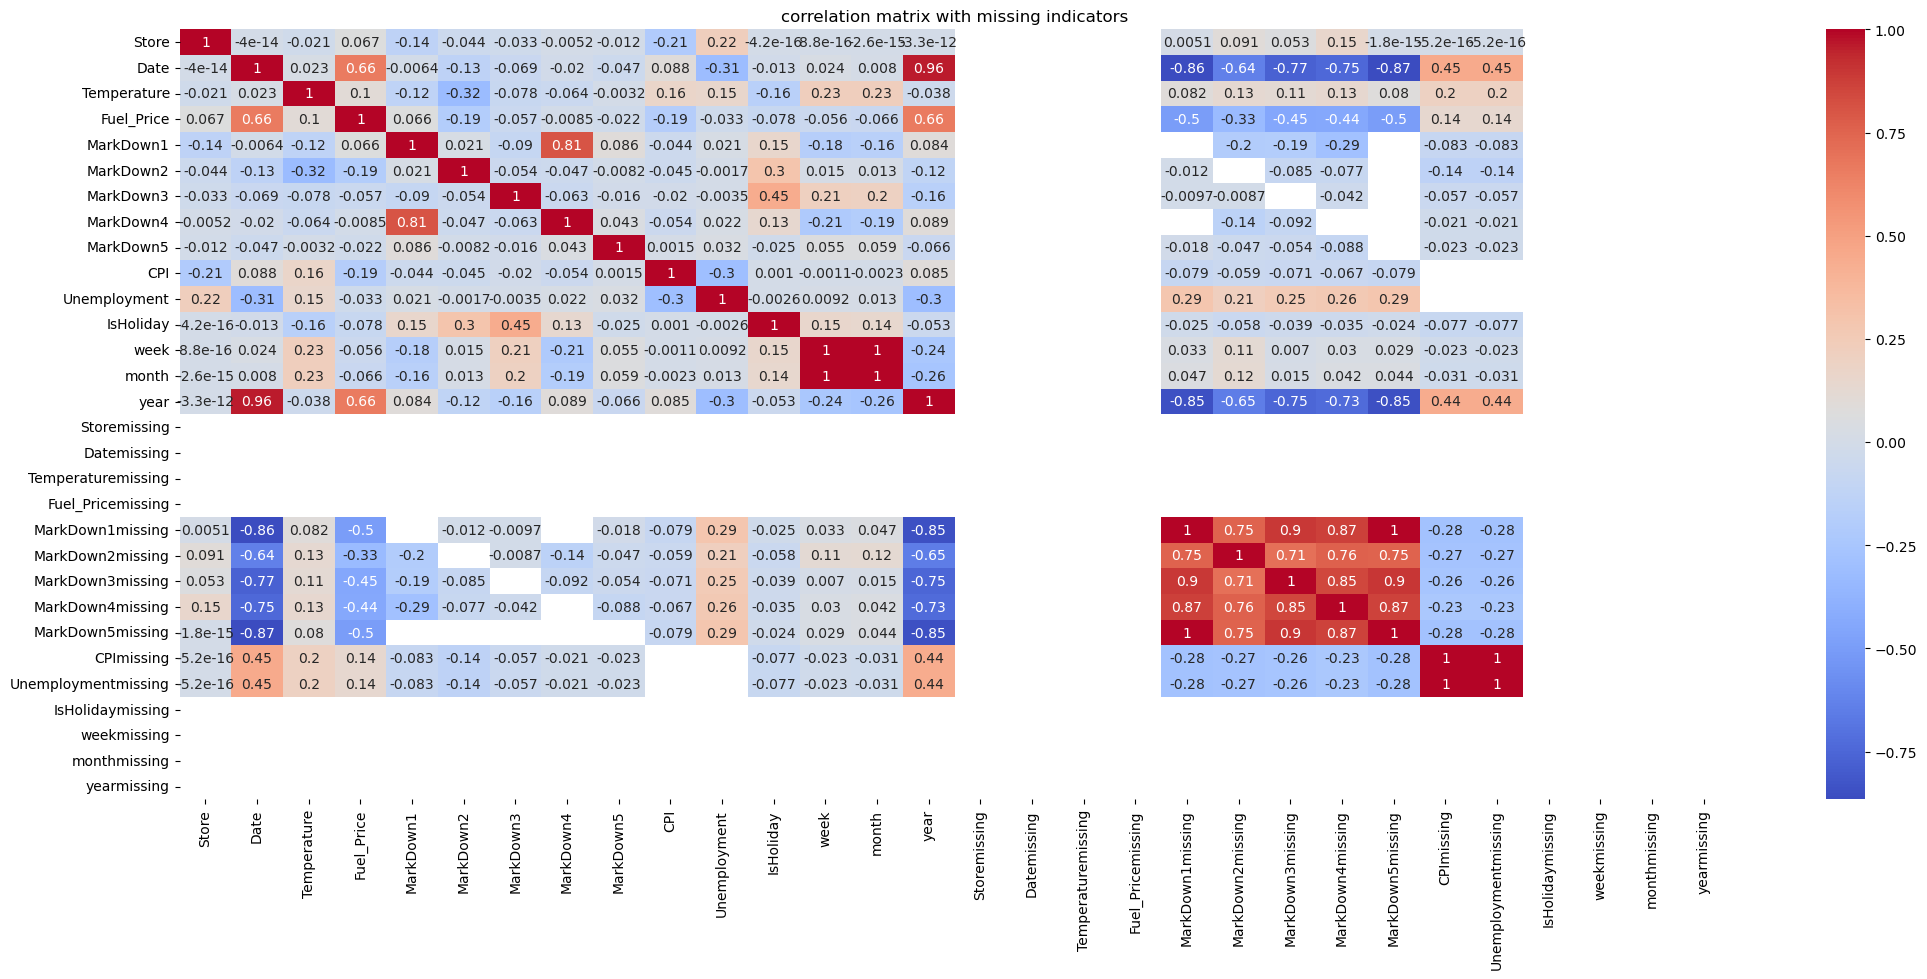

In [ ]:
# Corelation matrix
#Create indicator variables for missingness
missing_indicators = pd.DataFrame(np.where(df.isnull(),1,0),columns = df.columns)
#concatinate missing indicators with original data set
df_with_indicators = pd.concat([df , missing_indicators.add_suffix('missing')],axis = 1)
# Calculate the correlation matrix
correlation_matrix = df_with_indicators.corr()

#visulaize the corelation matrix
plt.figure(figsize=(25,10))
sns.heatmap(correlation_matrix , cmap = 'coolwarm',annot=True)
plt.title('correlation matrix with missing indicators')
plt.show()

In [ ]:
df["CPI"].isnull().sum()

585

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   CPI           8190 non-null   float64       
 5   Unemployment  8190 non-null   float64       
 6   IsHoliday     8190 non-null   bool          
 7   week          8190 non-null   UInt32        
 8   month         8190 non-null   int32         
 9   year          8190 non-null   int32         
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(4), int32(2), int64(1)
memory usage: 496.0 KB


In [ ]:
# Dropping the markdown columns since they are 50% empty
# filling the null values in remaining columns with mean
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],inplace=True , axis= 1)
df.fillna(df.mean() , inplace = True)

In [ ]:
df.head(2)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,week,month,year
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,5,2,2010
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,6,2,2010


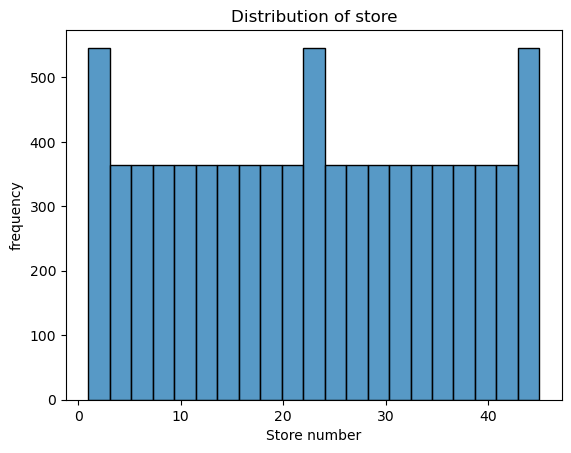

In [ ]:
sns.histplot(df.Store)
plt.title('Distribution of store')
plt.xlabel('Store number')
plt.ylabel('frequency')
plt.show()
plt.show()

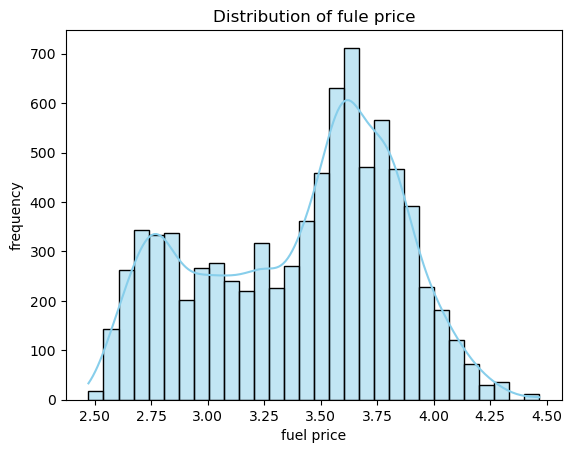

In [ ]:
sns.histplot(df.Fuel_Price , bins = 30 , kde = True , color = 'skyblue' )
plt.title('Distribution of fule price')
plt.xlabel('fuel price')
plt.ylabel('frequency')
plt.show()

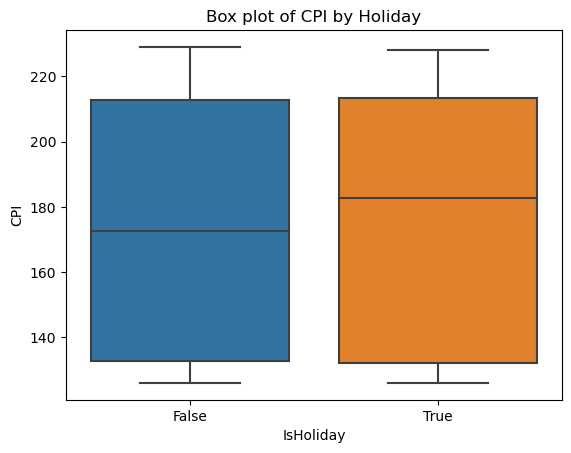

In [ ]:
sns.boxplot( x= 'IsHoliday' , y = 'CPI' , data = df)
plt.title('Box plot of CPI by Holiday')
plt.show()

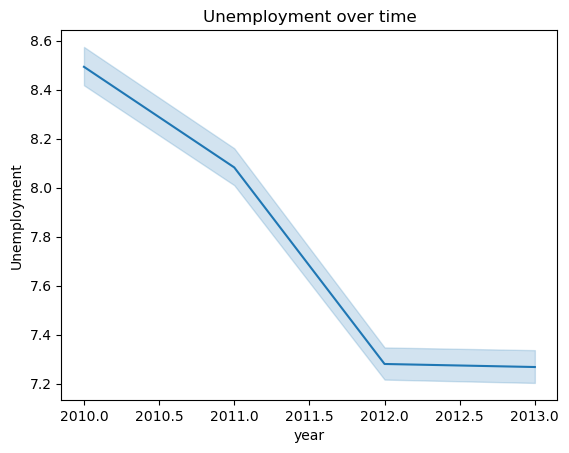

In [ ]:
sns.lineplot(x = 'year',y='Unemployment',data = df)
plt.title('Unemployment over time')
plt.show()

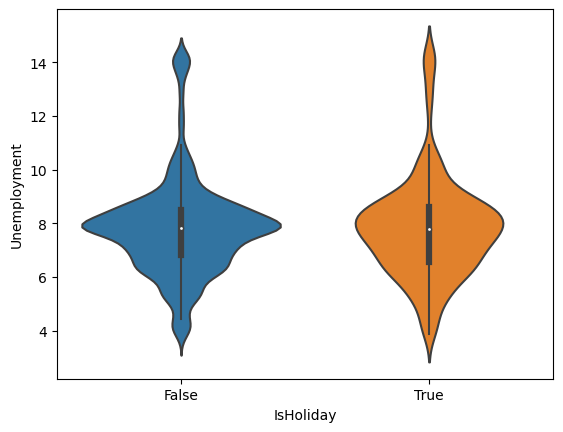

In [ ]:
sns.violinplot(x = 'IsHoliday', y = 'Unemployment',data = df)
plt.show()

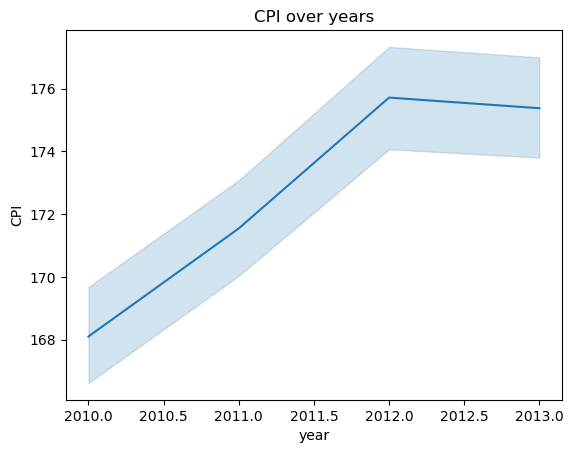

In [ ]:
sns.lineplot( x = 'year' , y = 'CPI' , data =df)
plt.title('CPI over years')
plt.show()

In [ ]:
df.head(1)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,week,month,year
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,5,2,2010


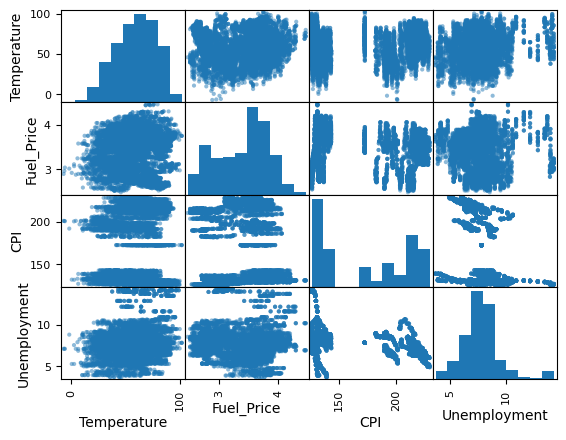

In [ ]:
from pandas.plotting import scatter_matrix
select_columns = ['Temperature','Fuel_Price','CPI','Unemployment']
scatter_matrix(df[select_columns])
plt.show()

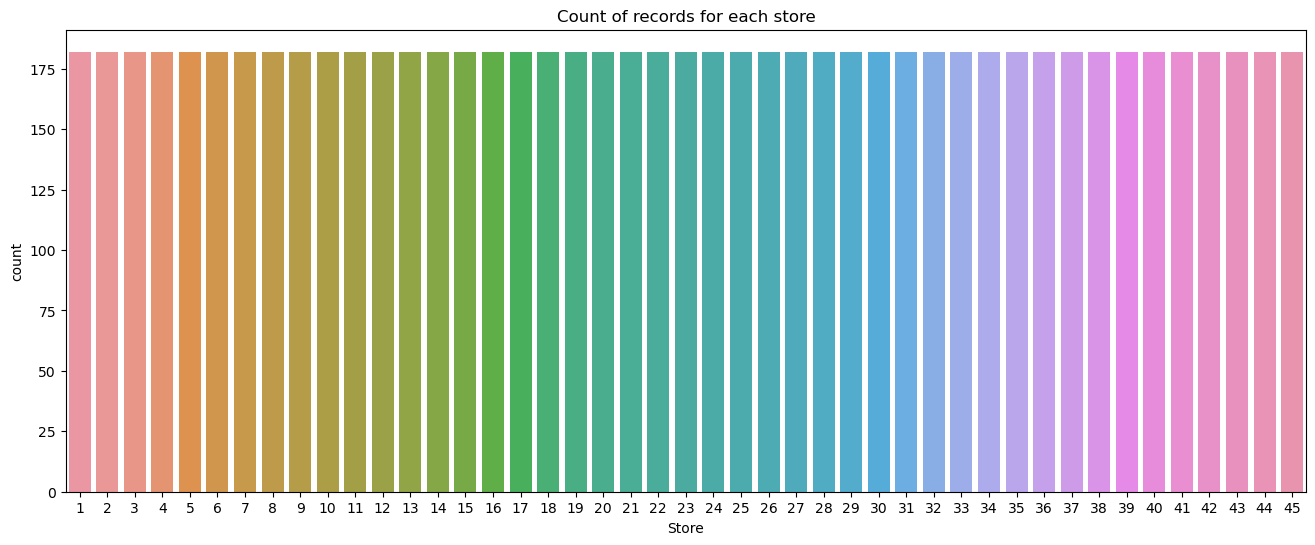

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(x = 'Store',data = df)
plt.title('Count of records for each store')
plt.show()

## Logistic regression model

###  IQR detection

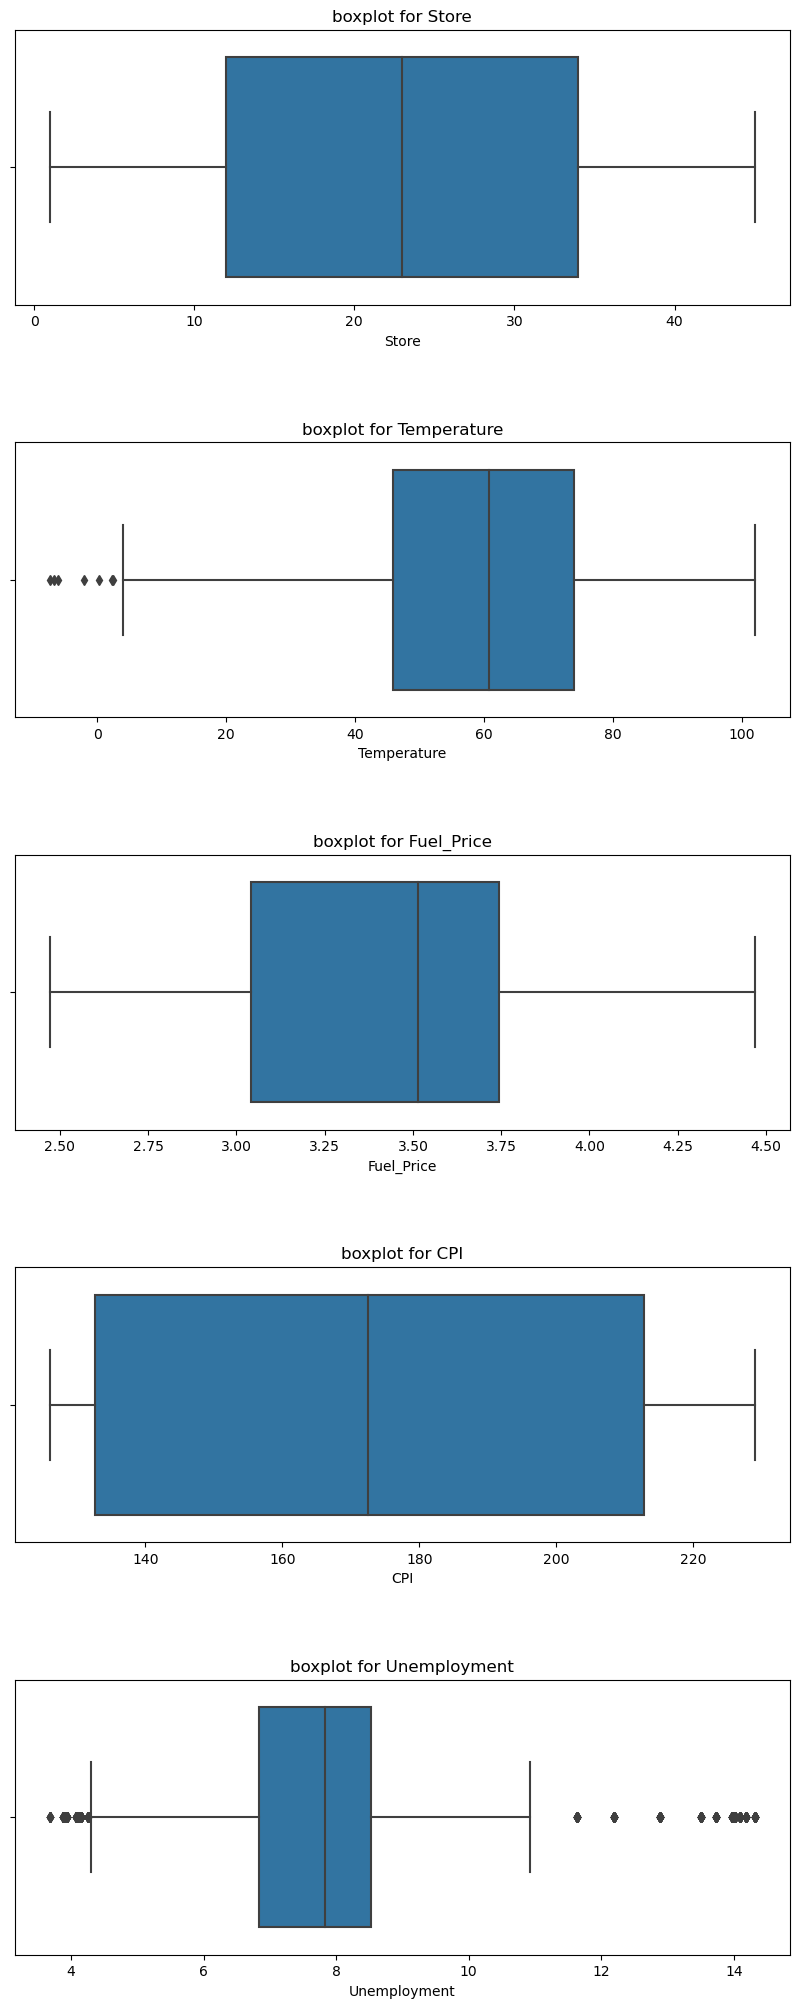

In [ ]:
# Select numeric columns for outlier detection
numeric_columns = df.select_dtypes(include = ['float','int64']).columns

# Set up subplots
fig , axes = plt.subplots(nrows=len(numeric_columns) , ncols = 1 , figsize=(10,5*len(numeric_columns)))
fig.subplots_adjust(hspace=0.5)

# Iterate through numeric columns and create boxplots
for i, column in enumerate(numeric_columns):
                         sns.boxplot(x = df[column],ax = axes[i])
                         axes[i].set_title(f'boxplot for {column}')

plt.show()

In [ ]:

# Removing outliers through z score
from scipy.stats import zscore

# select numeric columns to remove the outliers
numeric_columns = df.select_dtypes(include=['float','int64']).columns

#Calculate Z score for numeric columns
z_scores = zscore(df[numeric_columns])

#define a threshold for zscore
threshold = 3

#Create a mask to identify outliers
outlier_mask = (abs(z_scores)< threshold).all(axis = 1)

#Remove outliers
df_no_outliers = df[outlier_mask]

# Display the shape before and after removing the outliers
print(f'Shape before removing outliers:{df.shape}')
print(f'Shape after removing outliers:{df_no_outliers.shape}')



Shape before removing outliers:(8190, 10)
Shape after removing outliers:(7922, 10)


## Creating the Logistic regression model

In [ ]:
# Importing necessary liabraires
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
# Selecting the target column

target = df['IsHoliday']
features = df.drop(['IsHoliday','Date'],axis = 1)

#Splitting the data into train and test split
X_train , X_test , y_train , y_test = train_test_split(features , target , test_size=0.2 , random_state=42)

#Standardize scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

#Fit the model to the training data
logreg.fit(X_train_scaled , y_train)

#Make prediction on the test set
y_pred = logreg.predict(X_test_scaled)

#Evaluate the model
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nclassification Report:")
print(classification_report(y_test , y_pred))

Confusion matrix:
[[1520    1]
 [ 117    0]]

classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96      1521
        True       0.00      0.00      0.00       117

    accuracy                           0.93      1638
   macro avg       0.46      0.50      0.48      1638
weighted avg       0.86      0.93      0.89      1638




Key observations:
- The model has high accuracy (93%), but this is mostly due to the imbalance in the classes, with the majority being non-holidays.
- Precision for the positive class (holiday) is 0, indicating that the model predicted no true positives among the instances it classified as holidays.
- Recall for the positive class is also 0, indicating that the model missed all instances of actual holidays.
- The F1-score for the positive class is 0, reflecting the poor performance in predicting holidays.

These results suggest that the model may need improvement, especially in handling the minority class (holidays). we might consider strategies like oversampling the minority class, adjusting class weights, or exploring other algorithms to improve performance on the positive class. Additionally, further feature engineering or parameter tuning could be beneficial.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report

target = ['IsHoliday']
features = df.drop(['IsHoliday','Date'],axis =1)

print(len(target),len(features))

1 8190


In [ ]:
#Need to balance the class weight
from sklearn.utils.class_weight import compute_class_weight

#compute class weight
class_weights = compute_class_weight('balanced',classes=[False , True] , y=y_train)

#Create a dictonary to pass an argument to the logistic regression model

class_weight_dict = {False:class_weights[0],True:class_weights[1]}

#initialize the logostic regression model with class weight
logreg = LogisticRegression(random_state=42 , class_weight= class_weight_dict)

#fit the model for training data
logreg.fit(X_train_scaled , y_train)

#Make prediction on the test set
y_pred = logreg.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test , y_pred))
print("\nClassification Report:")
print(classification_report(y_test , y_pred))

Confusion Matrix:
[[1129  392]
 [  47   70]]

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.74      0.84      1521
        True       0.15      0.60      0.24       117

    accuracy                           0.73      1638
   macro avg       0.56      0.67      0.54      1638
weighted avg       0.90      0.73      0.79      1638



Interpretation:

The model has higher precision for the negative class (IsHoliday=False), indicating that when it predicts an absence of holiday, it is usually correct.
The recall for the positive class (IsHoliday=True) has increased, suggesting better performance in identifying instances of holidays.
The overall accuracy has improved with the introduction of class weights.

In [ ]:
# Performing on another algorithm Random Forest Classifier
#Splitting into train test split
X_train , X_test , y_train , y_test = train_test_split(features , target , test_size=0.2 , random_state=42)

#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#initialize the random forest
rf_classifier = RandomForestClassifier(random_state=42)

#Fit the model
rf_classifier.fit(X_train_scaled , y_train)

#Make prediction
y_pred_rf = rf_classifier.predict(X_test_scaled)


#Evaluate the random forest

print("Confusion Matrix:")
print(confusion_matrix(y_test , y_pred_rf))
print("\nClassification_Report:")
print(classification_report(y_test , y_pred_rf))

Confusion Matrix:
[[1521    0]
 [   0  117]]

Classification_Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1521
        True       1.00      1.00      1.00       117

    accuracy                           1.00      1638
   macro avg       1.00      1.00      1.00      1638
weighted avg       1.00      1.00      1.00      1638



In summary, the model appears to be performing exceptionally well on the provided dataset, achieving perfect predictions on both classes. However, it's crucial to assess its generalization performance on unseen data and consider potential overfitting to the training set.